# Anleitung zur Auswertung
Inhalt:
* Einlesen von Daten mit pandas
* Plotten der Daten mit matplotlib
* Lineare Regression mit scipy

Dazu müssen als erstes die genannten Pakete importiert werden:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#Außerscipy, das importiere ich gleich erst, ist nämlich ein bisschen anders

## Einlesen der Daten mit Pandas
<p>
    Um Exceltabellen mit mit der Hilfe von pandas einzulesen, wird der Befehl **pandas.read_excel() / pd.read_excel()** benutzt. Dieser erzeugt einen sog. **DataFrame**, welcher in in einer Variable (bspw. Daten) abgespeichert werden kann
</p>
<p>
    Dieser Funktion wird der Dateipfad übergeben. Da es sich um einen *String* handelt wird die *Zeichenkette* in
    doppelte od einfache Anführungsstriche ("", '') gesetzt.
</p>
<p>
    Nachfolgend kann noch das Tabellenblatt mit dem Argument **sheet_name** ausgewählt werden.
</p>
<p>
    Anzeigen lassen kann man sich die Daten indem man einfach den Namen des DataFrames aufruft, oder **DataFrame.head()**
    benutzt. Hierbei kann man sich die ersten n Zeilen anzeigen lassen Achtung! Python zählt ausgehend von 0!
</p>


In [2]:
Daten = pd.read_excel("Daten/Messdaten reaktion konti.xlsx", sheet_name="Tabelle1")
Daten.head(5)

,t,Kessel 1,Kessel 2,Kessel 3
0,0,7.8,7.8,7.8
1,1,1106.0,65.7,8.9
2,2,1814.0,201.0,13.9
3,3,2390.0,400.0,35.6
4,4,2860.0,646.0,38.3


## Plotten der Daten
<p> 
    Der Befehl zum Plotten der Daten ist ** plt.plot(x,y, **kwargs) ** um nur die Punkte zu zeigen wird plot durch **scatter** ersetzt
    <ul>
        <li> x und y sind, wie der Name schon sagt die x- u. y-Werte. </li> 
        <li> **kwarks sind optionale Argumente wie zB: </li>
        <ul>
            <li>label: damit wird der Legendeneintrag fer Datenreihe festgelegt</li>
            <li>color: bestimmt die Farbe der Datenreihe. Hier sind Klarnamen wie "green" oder hexfarben wie "#00ff00" möglich</li>
            <li>marker: verändert die Punkte des Plots Möglichkeiten sind Zeichen wie "X","x","+","o","H","h" usw... </li>
            <li>linestyle: hier kann die Linie verändert werden, zB "dashed", "dotted", "dashdot", "loosely dotted", "densly dotted" usw...
        </ul>
       </ul>
</p>
<p>
    Der Übersicht halber können die gewünschten x- und y-Datenreihen vorher in neue Variablen geschrieben werden. Dazu 
    wird mit pandas die Datenreihe wie folgt ausgewählt und in eine neue Variable geschrieben: <br>
    neue_variable = Daten["überschrift der Spalte"]
</p>
<p>
    Um dem Plot das gewünschte Aussehen zu geben können mit **plt.legend()** eine Legende hinzugefügt, mit **plt.title()**
    Der Titel des Plots festgelegt werden und mit **plt.grid()** Gitterlinien angezeigt werden. Da es sich bei dem text wieder um *Strings* handelt müssen auch hier die Anführungszeichen den Text umschließen. Außerdem ist es vllt. sinnvoll das stylesheet zu benutzen siehe **plt.style.use()**
</p>
<p>
    Die beschriftungen der Achsen erfolgt mit **plt.xlabel()** und **plt.ylabel()**. Genau wie bein Titel ist es möglich 
    in den texten LaTeX-Kommandos zu verwenden. Dazu kommt vor die "" ein *r* BSP siehe unten.
</p>
<p>
    Die Axen können mit **plt.xlim((min, max))** bzw **plt.ylim(min, max))** skaliert werden
</p>
<p>
    Um die Legende zu positionieren können die Argumente loc="upper right" , "lower left" oder "best" verwendet werden. Oder relative Angaben in der Form [x, y] zu den Achsen.
</p>


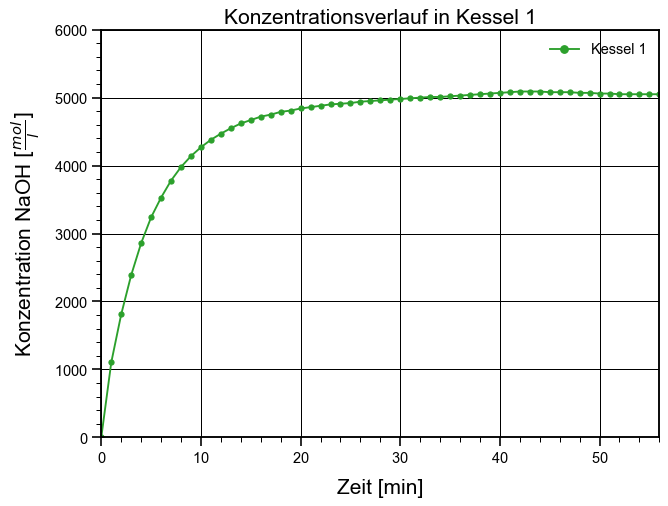

In [3]:
#-----Daten neu bennen
x = Daten["t"]
y = Daten["Kessel 1"]

#-----das Stylesheet
plt.style.use("https://raw.githubusercontent.com/LinusHats/PlotProgramm/main/ownstyle.mplstyle")

#-----Daten plotten
plt.plot(x,y, label="Kessel 1", color="Tab:green")

#-----Stylen des Diagramms
plt.xlim(0, 56)
plt.ylim(0, 6000)
plt.grid()
plt.title("Konzentrationsverlauf in Kessel 1")
plt.xlabel("Zeit [min]")
plt.ylabel(r"Konzentration NaOH $[\frac{mol}{l}]$")
plt.legend(loc="upper right")

### Plotten mehrer Datereihen in einem Diagramm
<p> 
    Analog zu obiger Vorgeshensweise. Jeder Plot kann einzeln behandelt werden, und wird jeweils mit **plt.plot()** ins 
    Diagramm geschrieben
<p>

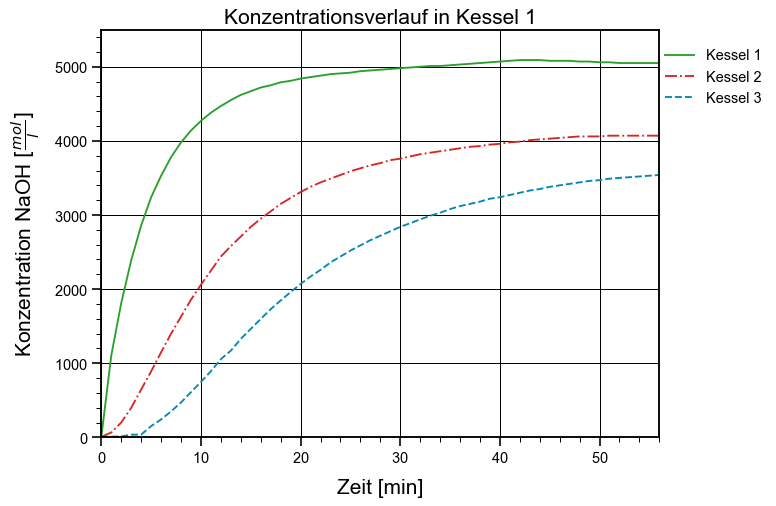

In [4]:
#-----Daten neu bennen
x = Daten["t"]
y1 = Daten["Kessel 1"]
y2 = Daten["Kessel 2"]
y3 = Daten["Kessel 3"]

#-----das Stylesheet
plt.style.use("https://raw.githubusercontent.com/LinusHats/PlotProgramm/main/ownstyle.mplstyle")

#-----Daten plotten
plt.plot(x,y1,  label="Kessel 1", color="Tab:green", marker=" ", linestyle="solid")
plt.plot(x,y2, label="Kessel 2", color="Tab:red", marker=" ", linestyle="dashdot")
plt.plot(x,y3, label="Kessel 3", color="#0489B1", marker=" ", linestyle="dashed")

#-----Stylen des Diagramms
plt.grid()
plt.title("Konzentrationsverlauf in Kessel 1")
plt.xlabel("Zeit [min]")
plt.ylabel(r"Konzentration NaOH $[\frac{mol}{l}]$")
plt.ylim((0,5500))
plt.legend(loc=[1, 0.8])

## Lineare Regression:
<p>
    einfachste Möglichkeit: np.stats linregress. Schmeißt die Steigung, den y-Achsenabschnitt und verscheidene Werte zur beurteilung der Regression raus...
</p>

In [5]:
import numpy as np #zum Erzeugen der Daten

#---------von stats linregress importieren
from scipy.stats import linregress

#---------Festlegen von x und y-Werten...Ich lasse mir hier einfach irgendwas rausgeben...
y = np.random.rand(100)           #Random Werte
x = np.linspace(0,500,100)        #Gleichmäßig 100 werte zwischen 0 und 500

#---------Regression
steigung, y_achsenabschnitt, R_wert, P_wert, standard_abweichung = linregress(x,y)
print("Die Steigung beträgt: {0:3.4f} \n der y-Achsenabschnitt ist: {1:3.4f} \n der R-Wert beträgt: {2:3.4f} \n usw...".format(steigung,y_achsenabschnitt, R_wert))

Die Steigung beträgt: 0.0002 
 der y-Achsenabschnitt ist: 0.3835 
 der R-Wert beträgt: 0.0908 
 usw...


Um jetzt die regression zu plotten kann man am besten eine Funktion schreiben, die den Verlauf der geraden beschreibt und dann y-Werte damit ausgeben lassen:

In [6]:
def f(x):                              #def sagt python, dass jetzt eine Funktion kommt
    y = steigung*x + y_achsenabschnitt #Wichtig ist der Einschub, der Rest sollte sich erschließen
    return y                           #die Funtion soll den y-wert zum eigegebenen x-Wert ausspucken
#-----------einmal ausprobieren
test = f(5)
test1 = f(100)
print(test, test1)

0.3843622962485539 0.40013184081044567


und jetzt den ganzen Bums auch noch plotten: <br>
<p>
    Dazu können wir die Funktion f(x) als neuen y-Wert einsetzen und diese mit den schon bekannten x-Werten füttern.<br>
    Außerdem will ich noch die Random Punkte angezeigt bekommen!
</p>

(-1.0, 2.0)

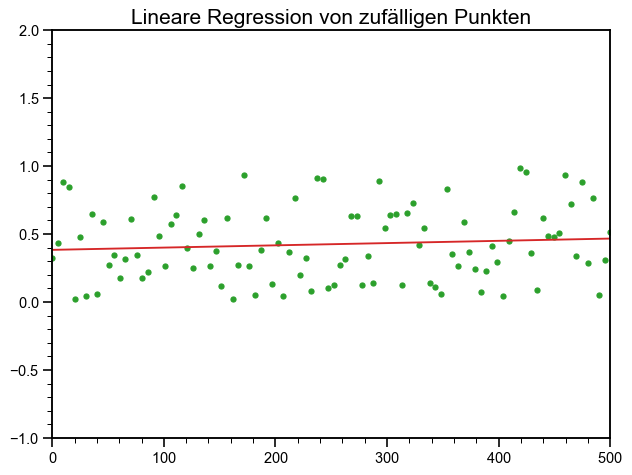

In [7]:
plt.scatter(x,y, color="Tab:green")
plt.plot(x, f(x), marker=" ", color="Tab:red")
plt.title("Lineare Regression von zufälligen Punkten")
plt.ylim((-1, 2))